In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Import tensorflow
import tensorflow as tf
# Import keras from tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# Import to_categorical from the correct location
from tensorflow.keras.utils import to_categorical
import random
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape[0])

60000


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
num_classes=10
num_of_samples=10
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# to_categorical means one hot encoding concept
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
# to_categorical means one hot encoding concept
y_train[1]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train = X_train/255
X_test = X_test/255
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
X_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Change 'lr' to 'learning_rate' in Adam optimizer
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9252 - loss: 0.2449 - val_accuracy: 0.9312 - val_loss: 0.2343
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9260 - loss: 0.2419 - val_accuracy: 0.9343 - val_loss: 0.2253
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9279 - loss: 0.2332 - val_accuracy: 0.9345 - val_loss: 0.2191
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.2403 - val_accuracy: 0.9337 - val_loss: 0.2231
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.2332 - val_accuracy: 0.9307 - val_loss: 0.2341
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.2345 - val_accuracy: 0.9318 - val_loss: 0.2311
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9262 - loss: 0.2381 - val_accuracy: 0.9287 - val_loss: 0.2391
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9297 - loss: 0.2283 - val_accuracy: 0.

Text(0.5, 0, 'epoch')

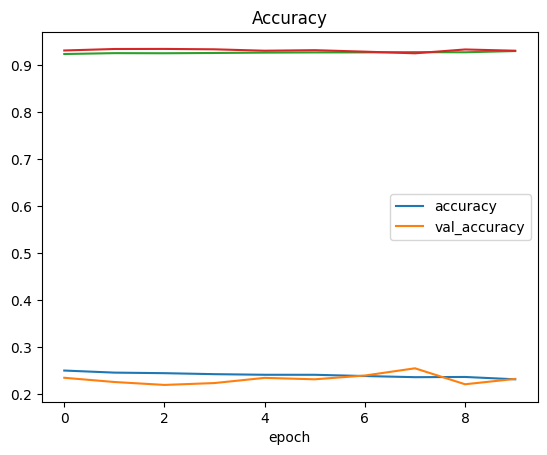

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

# Replace 'acc' and 'val_acc' with 'accuracy' and 'val_accuracy' respectively
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])


<class 'list'>
Test score: 0.2622606158256531
Test accuracy: 0.9196000099182129


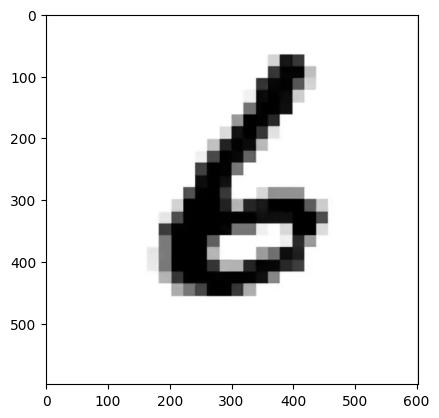

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

# Use a direct link to the image, instead of the researchgate link.
url = 'https://i.stack.imgur.com/Ds5Rc.png'

response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses (like 403)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Prediction: [6]


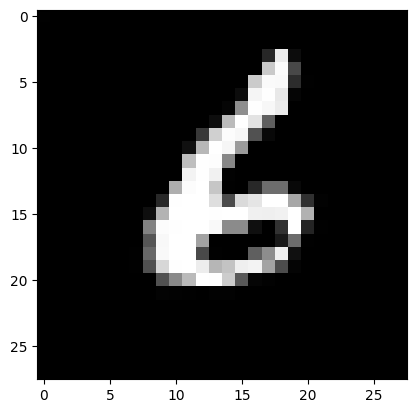

In [ ]:
import requests
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code) ...

# Use a direct link to the image, instead of the researchgate link.
url = 'https://i.stack.imgur.com/Ds5Rc.png'

response = requests.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses (like 403)
img = Image.open(response.raw)

# Convert the image to RGB explicitly when opening with PIL
img = img.convert('RGB')

# ... (rest of the code, but skip this line:  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) )

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
# The image is now in RGB format, so you can convert it to grayscale
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #changed from COLOR_BGR2GRAY
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = img/255
img = img.reshape(1, 784)

# Use model.predict and np.argmax to get predicted class
prediction = np.argmax(model.predict(img), axis=-1)
print("Prediction:", prediction)